In [1]:
# pandas and plotting libraries for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module containing functions for manipulation pyspark dataframes
import pyspark.sql.functions as f

# class which will let us create spark objects
from pyspark.sql import SparkSession

## Create a Spark Session

In [2]:
spark = (
    SparkSession
    .builder
    .appName('data_exploration')
    .master('local[2]')
    .getOrCreate()
)

## Read in data file

In [4]:
df = (
    spark
    .read
    .option('header', 'true')
    .option('inferSchema', 'true')
    .csv('../taxi.csv')
)

In [5]:
df = df.select(*[f.col(c).alias('_'.join(c.lower().split(' '))) for c in df.columns])

In [6]:
date_format = 'MM/dd/yyyy hh:mm:ss a'
df = (
    df
    .withColumn('start_time', f.to_timestamp(f.col('trip_start_timestamp'), date_format))
    .withColumn('end_time', f.to_timestamp(f.col('trip_end_timestamp'), date_format))
)

In [7]:
df = df.where(f.year('start_time') == 2016)

In [8]:
cols = [
    'trip_id',
    'taxi_id',
    'start_time',
    'end_time', 
    'trip_miles',
    'pickup_census_tract',
    'dropoff_census_tract',
    'fare', 
    'tips',
    'trip_total',
    'payment_type',
    'company',
]
df = df.select(cols)

In [9]:
(
    df
    .coalesce(1)
    .write
    .format("com.databricks.spark.csv")
    .option("header", "true")
    .save("taxi_2016.csv")
)

In [41]:
df.limit(100).toPandas()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,10b8acfca15b4de7a777b9da0d65fc513916a663,1d5c92da7f240e8a24b8ca4635a64a519961d69afafbf8...,05/10/2013 09:00:00 PM,05/10/2013 09:15:00 PM,360,0.00,1.703108e+10,1.703108e+10,8,8.0,...,8.65,Credit Card,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.909496,-87.630964,POINT (-87.630963601 41.9094956686),37
1,10b8ad1f94cbe309e5a115a1b5bb2197368aff78,302b5b17591e4cc1b753be1cf0f3f15c0dc43cde144686...,07/20/2014 02:45:00 PM,07/20/2014 03:00:00 PM,720,2.60,1.703108e+10,1.703106e+10,8,6.0,...,11.05,Cash,None,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),37
2,10b8ad5d255dfe9e774de9c114bc30827ae60a08,3ff210dd510e29474c49f901fafba9a7e14801f19e40b6...,09/05/2015 04:45:00 PM,09/05/2015 05:00:00 PM,840,0.40,1.703132e+10,1.703103e+10,32,3.0,...,21.06,Credit Card,Blue Ribbon Taxi Association Inc.,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.962179,-87.645379,POINT (-87.6453787624 41.962178629),38
3,10b8ad6c5239b5623465bef8517fe7c11ec3aae3,9fb94ceaab8c4ba0476f7dce462b8965841f7848dfb81d...,05/23/2014 08:15:00 AM,05/23/2014 08:30:00 AM,480,0.10,NaN,NaN,6,6.0,...,6.25,Cash,None,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),57
4,10b8ad783c8c320fb094e76449d45d081487aaa5,a1562a6ba4d1219e2f5c0f084844fbb31bacdb192481cf...,07/10/2013 08:45:00 AM,07/10/2013 09:00:00 AM,300,0.00,1.703128e+10,1.703132e+10,28,32.0,...,6.65,Cash,Taxi Affiliation Services,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),29
5,10b8ad92494eb8427353cbdde711c5a29b660bbf,4af59854ce6531f2b214cefdf3f55717b2bc35c3be91ba...,11/08/2015 01:30:00 AM,11/08/2015 01:30:00 AM,240,0.20,1.703108e+10,1.703108e+10,8,8.0,...,5.95,Cash,Taxi Affiliation Services,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37
6,10b8adc9f519716e87ac19d42c59ff4060ecaf08,0f831bff43d83f396f2e4950126c6137dcdb60fb4c8580...,09/12/2014 09:00:00 PM,09/12/2014 09:00:00 PM,0,1.10,1.703132e+10,1.703132e+10,32,32.0,...,5.25,Cash,None,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),38
7,10b8adcaf9058fecfa79b0db739dccddd69454e0,9190aec005f6d8b705845c2b3e9fca8c89c233ff25ae87...,10/01/2015 11:00:00 AM,10/01/2015 11:00:00 AM,420,1.10,1.703128e+10,1.703108e+10,28,8.0,...,9.25,Credit Card,None,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),29
8,10b8ae16697dc11069f5aee595c33d35fad4c488,a9c03c904e899fd10c47c237b5352239f5ce6e181227e7...,09/10/2015 06:15:00 PM,09/10/2015 06:30:00 PM,780,1.00,1.703108e+10,1.703108e+10,8,8.0,...,8.65,Cash,Taxi Affiliation Services,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37
9,10b8ae23847aeff11587cf33d3d9040631051749,deec568f18d18fb40292b918b82311ac8006ada6a8a1ff...,01/03/2016 02:00:00 PM,01/03/2016 02:15:00 PM,300,1.00,1.703132e+10,1.703128e+10,32,28.0,...,6.50,Cash,None,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.879255,-87.642649,POINT (-87.642648998 41.8792550844),38


In [42]:
df.columns

['Trip ID',
 'Taxi ID',
 'Trip Start Timestamp',
 'Trip End Timestamp',
 'Trip Seconds',
 'Trip Miles',
 'Pickup Census Tract',
 'Dropoff Census Tract',
 'Pickup Community Area',
 'Dropoff Community Area',
 'Fare',
 'Tips',
 'Tolls',
 'Extras',
 'Trip Total',
 'Payment Type',
 'Company',
 'Pickup Centroid Latitude',
 'Pickup Centroid Longitude',
 'Pickup Centroid Location',
 'Dropoff Centroid Latitude',
 'Dropoff Centroid Longitude',
 'Dropoff Centroid  Location',
 'Community Areas']

In [44]:
df.count()

16499764

In [12]:
df.groupby('taxi_id').count().count()

5515

In [13]:
df.groupby('trip_id').count().count()

376359

In [14]:
trips_per_taxi = (
    df
    .where((f.col('payment_type') == 'Credit Card') | (f.col('payment_type') == 'Cash'))
    .groupby('taxi_id', 'payment_type')
    .count()
    .toPandas()
)

Text(0.5, 1.0, 'Trips Per Taxi Paid By Credit Card')

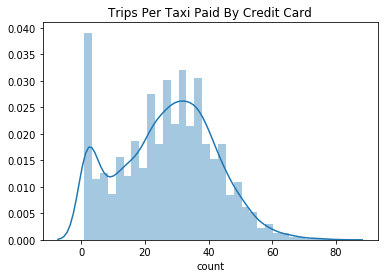

In [15]:
plt.figure()
sns.distplot(
    trips_per_taxi.loc[trips_per_taxi['payment_type']=='Credit Card', 'count']
).set_title('Trips Per Taxi Paid By Credit Card')

Text(0.5, 1.0, 'Trips Per Taxi Paid By Cash')

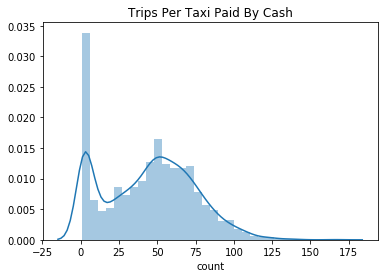

In [16]:
plt.figure()
sns.distplot(
    trips_per_taxi.loc[trips_per_taxi['payment_type']=='Cash', 'count']
).set_title('Trips Per Taxi Paid By Cash')

In [17]:
df.groupby('taxi_id').count().orderBy('count', ascending=True).limit(10).toPandas()

,taxi_id,count
0,724dc5fa83e1ab1ac754065354443e470c1a228934366f...,1
1,5cb66770957bb19b29a138acdb6e116a1035fb042528b8...,1
2,0678f31a979c4f311e3361cf1639af2603195057402c1f...,1
3,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,1
4,8e9e56e932a0ee7383b65a39b4c76fe29ec20783482577...,1
5,1d8a220e790816348cfb997c0946b77bc5adae20de35cb...,1
6,46a383b53e473df8617b6b7d016e74c1a27d68b2362f50...,1
7,90d83b1a646ae05a1b32e9a0ee7a13e01a41d34ae8c803...,1
8,5d9b04700e18c13489a435d0017e3a0d7ef7345d6d5d05...,1
9,6121a3cdc39285a23bc0084c872dbfe925444f2329e5ac...,1


In [18]:
df.groupby('taxi_id').count().orderBy('count', ascending=False).limit(10).toPandas()

,taxi_id,count
0,4f189764b8d9b6f71f7936ab414cac07634be0a00790ca...,216
1,0861cb74337c620cb9ec639af7dc3aa99173b768caf750...,213
2,7bdac954f2be7f55aa04f12e4be5d954c1d0d42a237bb5...,206
3,74b9b3ba2f90ab6dfe7352dc2cac4dfebb2fffa053bafe...,204
4,66f133799b2aa4c5108142a1187b3a09ae6d0be870704a...,201
5,89bfd3f9c1a6014be246046cff548f19edbcb2030d129c...,196
6,a21e9e59e7c6a55f33909fe86893b38a60e4baab03cf8a...,195
7,dfe0b23f70d816bcd021cf8f279b99baa5173ebe381a20...,193
8,de41f7d7441cb9a3d5e403c24868c33a7e63f5c279ff89...,193
9,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,193


In [19]:
counts = df.groupby('taxi_id').count().toPandas()

Text(0.5, 1.0, 'Trips Per Taxi')

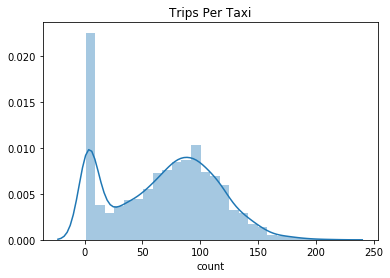

In [20]:
sns.distplot(counts['count']).set_title('Trips Per Taxi')

In [ ]:
date_format = 'MM/dd/yyyy hh:mm:ss a'

In [ ]:
df = (
    df
    .withColumn('start_time', f.to_timestamp(f.col('trip_start_timestamp'), date_format))
    .withColumn('end_time', f.to_timestamp(f.col('trip_end_timestamp'), date_format))
)

In [48]:
df.limit(100).toPandas()

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid__location,community_areas,start_time,end_time
0,10b8acfca15b4de7a777b9da0d65fc513916a663,1d5c92da7f240e8a24b8ca4635a64a519961d69afafbf8...,05/10/2013 09:00:00 PM,05/10/2013 09:15:00 PM,360,0.00,1.703108e+10,1.703108e+10,8,8.0,...,Taxi Affiliation Services,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.909496,-87.630964,POINT (-87.630963601 41.9094956686),37,2013-05-10 21:00:00,2013-05-10 21:15:00
1,10b8ad1f94cbe309e5a115a1b5bb2197368aff78,302b5b17591e4cc1b753be1cf0f3f15c0dc43cde144686...,07/20/2014 02:45:00 PM,07/20/2014 03:00:00 PM,720,2.60,1.703108e+10,1.703106e+10,8,6.0,...,None,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),37,2014-07-20 14:45:00,2014-07-20 15:00:00
2,10b8ad5d255dfe9e774de9c114bc30827ae60a08,3ff210dd510e29474c49f901fafba9a7e14801f19e40b6...,09/05/2015 04:45:00 PM,09/05/2015 05:00:00 PM,840,0.40,1.703132e+10,1.703103e+10,32,3.0,...,Blue Ribbon Taxi Association Inc.,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.962179,-87.645379,POINT (-87.6453787624 41.962178629),38,2015-09-05 16:45:00,2015-09-05 17:00:00
3,10b8ad6c5239b5623465bef8517fe7c11ec3aae3,9fb94ceaab8c4ba0476f7dce462b8965841f7848dfb81d...,05/23/2014 08:15:00 AM,05/23/2014 08:30:00 AM,480,0.10,NaN,NaN,6,6.0,...,None,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),57,2014-05-23 08:15:00,2014-05-23 08:30:00
4,10b8ad783c8c320fb094e76449d45d081487aaa5,a1562a6ba4d1219e2f5c0f084844fbb31bacdb192481cf...,07/10/2013 08:45:00 AM,07/10/2013 09:00:00 AM,300,0.00,1.703128e+10,1.703132e+10,28,32.0,...,Taxi Affiliation Services,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),29,2013-07-10 08:45:00,2013-07-10 09:00:00
5,10b8ad92494eb8427353cbdde711c5a29b660bbf,4af59854ce6531f2b214cefdf3f55717b2bc35c3be91ba...,11/08/2015 01:30:00 AM,11/08/2015 01:30:00 AM,240,0.20,1.703108e+10,1.703108e+10,8,8.0,...,Taxi Affiliation Services,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37,2015-11-08 01:30:00,2015-11-08 01:30:00
6,10b8adc9f519716e87ac19d42c59ff4060ecaf08,0f831bff43d83f396f2e4950126c6137dcdb60fb4c8580...,09/12/2014 09:00:00 PM,09/12/2014 09:00:00 PM,0,1.10,1.703132e+10,1.703132e+10,32,32.0,...,None,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),38,2014-09-12 21:00:00,2014-09-12 21:00:00
7,10b8adcaf9058fecfa79b0db739dccddd69454e0,9190aec005f6d8b705845c2b3e9fca8c89c233ff25ae87...,10/01/2015 11:00:00 AM,10/01/2015 11:00:00 AM,420,1.10,1.703128e+10,1.703108e+10,28,8.0,...,None,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),29,2015-10-01 11:00:00,2015-10-01 11:00:00
8,10b8ae16697dc11069f5aee595c33d35fad4c488,a9c03c904e899fd10c47c237b5352239f5ce6e181227e7...,09/10/2015 06:15:00 PM,09/10/2015 06:30:00 PM,780,1.00,1.703108e+10,1.703108e+10,8,8.0,...,Taxi Affiliation Services,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37,2015-09-10 18:15:00,2015-09-10 18:30:00
9,10b8ae23847aeff11587cf33d3d9040631051749,deec568f18d18fb40292b918b82311ac8006ada6a8a1ff...,01/03/2016 02:00:00 PM,01/03/2016 02:15:00 PM,300,1.00,1.703132e+10,1.703128e+10,32,28.0,...,None,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.879255,-87.642649,POINT (-87.642648998 41.8792550844),38,2016-01-03 14:00:00,2016-01-03 14:15:00


In [51]:
display(df.where(f.year('start_time') == 2016))

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid__location,community_areas,start_time,end_time
0,10b8ae23847aeff11587cf33d3d9040631051749,deec568f18d18fb40292b918b82311ac8006ada6a8a1ff...,01/03/2016 02:00:00 PM,01/03/2016 02:15:00 PM,300,1.00,1.703132e+10,1.703128e+10,32,28.0,...,None,41.870607,-87.622173,POINT (-87.6221729369 41.8706073724),41.879255,-87.642649,POINT (-87.642648998 41.8792550844),38,2016-01-03 14:00:00,2016-01-03 14:15:00
1,10b8b00d0f54e49fa09ba66b9d1fe5c3a44bd639,22c2c92ba4cc6458780df495b72b3fb22a83cfd79728bf...,05/09/2016 07:30:00 PM,05/09/2016 07:45:00 PM,180,0.00,1.703128e+10,1.703184e+10,28,32.0,...,Taxi Affiliation Services,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.871016,-87.631407,POINT (-87.6314065252 41.8710158803),29,2016-05-09 19:30:00,2016-05-09 19:45:00
2,10b8b20f6e87bfaf0a658b2725b9a5ce29cb1a43,3a4af34907634686a9444651f65638134c2a972bfc5994...,03/09/2016 08:45:00 AM,03/09/2016 08:45:00 AM,300,0.90,1.703184e+10,1.703108e+10,32,8.0,...,Northwest Management LLC,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),38,2016-03-09 08:45:00,2016-03-09 08:45:00
3,10b8b21fba6a350d71ab815febecae503187490b,e6ec7ccfda661f2050f932f672395ff77cd1359b3ae62b...,04/20/2016 12:30:00 AM,04/20/2016 12:45:00 AM,360,1.60,1.703183e+10,1.703132e+10,28,32.0,...,Taxi Affiliation Services,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),29,2016-04-20 00:30:00,2016-04-20 00:45:00
4,10b8b22261d36a0c51deab377237260e171765d6,f837696d781bfe4f3da410734cbfa51b47f328de974a96...,04/12/2016 02:30:00 PM,04/12/2016 02:30:00 PM,360,0.80,NaN,NaN,8,NaN,...,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,None,37,2016-04-12 14:30:00,2016-04-12 14:30:00
5,10b8b2a042e9bc7e8ca948cff76f959bcd81655b,cae7b41a1af6467dbadb3446672faf7eed1cf0079be5ac...,07/29/2016 12:30:00 AM,07/29/2016 12:30:00 AM,600,2.20,NaN,NaN,6,5.0,...,Taxi Affiliation Services,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),57,2016-07-29 00:30:00,2016-07-29 00:30:00
6,10b8b2c847a032eba3500dfe134baf3472e6d1bc,2c2846e06a06b51bf72e041bce82b95d5471941476ff25...,01/27/2016 04:45:00 PM,01/27/2016 05:30:00 PM,2880,15.50,NaN,NaN,56,5.0,...,Choice Taxi Association,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),53,2016-01-27 16:45:00,2016-01-27 17:30:00
7,10b8b33db913f0b34ed75945748cebc5cc6c5b4f,af7c294a5ab2a7fcd6fb4b06820fe8abf65e649d814526...,02/07/2016 05:15:00 PM,02/07/2016 05:30:00 PM,900,3.11,1.703108e+10,1.703183e+10,8,7.0,...,None,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.914747,-87.654007,POINT (-87.6540070286 41.9147473049),37,2016-02-07 17:15:00,2016-02-07 17:30:00
8,10b8b470339ffada95f7dc0c9180058b7eb99df4,6778d44f5164d57ce76c95242f4f3af1dd0986082f1be3...,01/30/2016 02:15:00 AM,01/30/2016 02:15:00 AM,300,0.00,NaN,NaN,77,3.0,...,Taxi Affiliation Services,41.986712,-87.663416,POINT (-87.6634164054 41.9867117999),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),76,2016-01-30 02:15:00,2016-01-30 02:15:00
9,10b8b62e54671f95d079fea70268e7208e90c7b5,493b6af5931ea2c7c6a82d9d6e2e17af3abae397edd72e...,04/05/2016 04:00:00 PM,04/05/2016 04:45:00 PM,3120,1.10,1.703198e+10,1.703132e+10,76,32.0,...,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),75,2016-04-05 16:00:00,2016-04-05 16:45:00


In [ ]:
df_2016 = df.where(f.year('start_time') == 2016)

In [ ]:
cols = [
    'trip_id',
    'taxi_id',
    'start_time',
    'end_time', 
    'trip_miles',
    'pickup_census_tract',
    'dropoff_census_tract',
    'fare', 
    'tips',
    'trip_total',
    'payment_type',
    'company',
]
df = df_2016.select(cols)

In [63]:
display(df)

,trip_id,taxi_id,start_time,end_time,trip_miles,pickup_census_tract,dropoff_census_tract,fare,tips,trip_total,payment_type,company
0,10b8acfca15b4de7a777b9da0d65fc513916a663,1d5c92da7f240e8a24b8ca4635a64a519961d69afafbf8...,2013-05-10 21:00:00,2013-05-10 21:15:00,0.00,1.703108e+10,1.703108e+10,6.65,2.00,8.65,Credit Card,Taxi Affiliation Services
1,10b8ad1f94cbe309e5a115a1b5bb2197368aff78,302b5b17591e4cc1b753be1cf0f3f15c0dc43cde144686...,2014-07-20 14:45:00,2014-07-20 15:00:00,2.60,1.703108e+10,1.703106e+10,10.05,0.00,11.05,Cash,None
2,10b8ad5d255dfe9e774de9c114bc30827ae60a08,3ff210dd510e29474c49f901fafba9a7e14801f19e40b6...,2015-09-05 16:45:00,2015-09-05 17:00:00,0.40,1.703132e+10,1.703103e+10,15.85,4.21,21.06,Credit Card,Blue Ribbon Taxi Association Inc.
3,10b8ad6c5239b5623465bef8517fe7c11ec3aae3,9fb94ceaab8c4ba0476f7dce462b8965841f7848dfb81d...,2014-05-23 08:15:00,2014-05-23 08:30:00,0.10,NaN,NaN,6.25,0.00,6.25,Cash,None
4,10b8ad783c8c320fb094e76449d45d081487aaa5,a1562a6ba4d1219e2f5c0f084844fbb31bacdb192481cf...,2013-07-10 08:45:00,2013-07-10 09:00:00,0.00,1.703128e+10,1.703132e+10,5.65,0.00,6.65,Cash,Taxi Affiliation Services
5,10b8ad92494eb8427353cbdde711c5a29b660bbf,4af59854ce6531f2b214cefdf3f55717b2bc35c3be91ba...,2015-11-08 01:30:00,2015-11-08 01:30:00,0.20,1.703108e+10,1.703108e+10,4.45,0.00,5.95,Cash,Taxi Affiliation Services
6,10b8adc9f519716e87ac19d42c59ff4060ecaf08,0f831bff43d83f396f2e4950126c6137dcdb60fb4c8580...,2014-09-12 21:00:00,2014-09-12 21:00:00,1.10,1.703132e+10,1.703132e+10,5.25,0.00,5.25,Cash,None
7,10b8adcaf9058fecfa79b0db739dccddd69454e0,9190aec005f6d8b705845c2b3e9fca8c89c233ff25ae87...,2015-10-01 11:00:00,2015-10-01 11:00:00,1.10,1.703128e+10,1.703108e+10,6.25,2.00,9.25,Credit Card,None
8,10b8ae16697dc11069f5aee595c33d35fad4c488,a9c03c904e899fd10c47c237b5352239f5ce6e181227e7...,2015-09-10 18:15:00,2015-09-10 18:30:00,1.00,1.703108e+10,1.703108e+10,7.65,0.00,8.65,Cash,Taxi Affiliation Services
9,10b8ae23847aeff11587cf33d3d9040631051749,deec568f18d18fb40292b918b82311ac8006ada6a8a1ff...,2016-01-03 14:00:00,2016-01-03 14:15:00,1.00,1.703132e+10,1.703128e+10,6.50,0.00,6.50,Cash,None


In [64]:
%%time
df.count()

CPU times: user 40 ms, sys: 20 ms, total: 60 ms
Wall time: 1min 18s


16499764

In [50]:
def display(spark_df, limit=100):
    return spark_df.limit(limit).toPandas()

In [68]:
display(df)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36063)
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/py4j/java_gateway.py", line 929, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/py4j/java_gateway.py", line 1067, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36063)

In [66]:
(
    df
    .write
    .format("com.databricks.spark.csv")
    .option("header", "true")
    .save("2017.csv")
)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.5/dist-packages/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.5/dist-packages/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: An error occurred while calling o167.write